In [1]:
#import libraries 
import pandas as pd
import numpy as np
#load in data and view data 
df = pd.read_csv('../01 Data Carpentry/resources/complete_data_with_RoC.csv', delimiter=',')
df.head()

State  Year  Rate  Sample Size  RoC Rate  Total Poverty  Number Poverty  \
0      1  2010  62.6          336  0.150735     703.507576      812.000000   
1      2  2010  63.6          269  0.030794     695.000000       87.000000   
2      3  2010  59.0          299  0.475000     703.507576      399.214076   
3      4  2010  58.9          341  0.570667     703.507576      440.000000   
4      5  2010  55.7          411  0.003604     703.507576      399.214076   

   Percent Poverty  RoC Total Poverty  RoC Number Poverty         ...          \
0             17.2           0.000000            0.054545         ...           
1             12.5           0.010174            0.074074         ...           
2             18.8           0.000000            0.000000         ...           
3             15.3           0.000000           -0.182156         ...           
4             16.3           0.000000            0.000000         ...           

   Num Med Exempt  Total Population  Pct NonMed Exempt  Num NonMed Exempt  \
0            91.0           75358.0                0.4              282.0   
1           161.0            9641.0                3.8              369.0   
2           185.0           89287.0                2.8             2479.0   
3            28.0           34733.0                0.5              165.0   
4           998.0          507191.0                2.0            10280.0   

   Pct Any Exempt  Num Any Exempt  RoC Num Med Exempt  RoC Total Population  \
0             0.5           373.0                 0.0                   0.0   
1             5.5           530.0                 0.0                   0.0   
2             3.0          2665.0                 0.0                   0.0   
3             0.6           193.0                 0.0                   0.0   
4             2.2         11278.0                 0.0                   0.0   

   RoC Num NonMed Exempt  RoC Pct Any Exempt  
0                    0.0                 0.0  
1                    0.0                 0.0  
2                    0.0                 0.0  
3                    0.0                 0.0  
4                    0.0                 0.0  

[5 rows x 153 columns]

In [2]:
#import libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#X = df.drop(columns='Rate').values
#creating X and y dataframes
#X is RoC Rate 
#assoc_y is RoC Num Associate Degree
X = df.loc[:, 'RoC Rate'].values.reshape(-1,1)
assoc_y = df.loc[:, 'RoC Num Associate Degree'].values

#split X and y with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X,assoc_y, test_size=.25)

#define linear regression
regressor = LinearRegression()
#fit the regression with X train and Y train 
regressor.fit(X_train, y_train)

#predict y based on X test and the model fitted above 
y_pred = regressor.predict(X_test)

In [3]:
#import libraries 
import matplotlib.pyplot as plt

#plot scatter plot
#add labels and show values 
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Imm Rate Rate of Change vs # Associate Degree Rate of Change (Training Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# Associate Degree Rate of Change')
plt.show()

#plot scatter plot
#add labels and show values 
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Imm Rate Rate of Change vs % Associate Degree Rate of Change (Test Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# Associate Degree Rate of Change')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

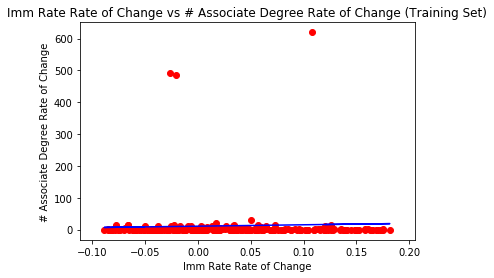

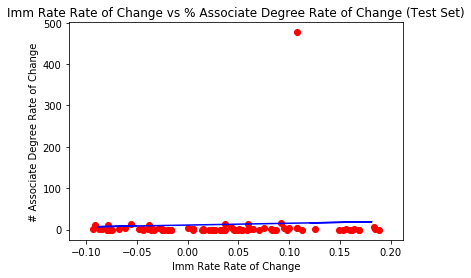

In [4]:
from sklearn.covariance import EllipticEnvelope

#define elliptic envelope function 
def elliptic_envelope_session():
    # Fit envelope
    envelope = EllipticEnvelope(support_fraction=1, contamination=0.2).fit(X)

    # Create an boolean indexing array to pick up outliers
    outliers = envelope.predict(X)==-1

    # Re-slice X,y into a cleaned dataset with outliers excluded
    X_clean = X[~outliers]
    y_clean = assoc_y[~outliers]
    return X_clean, y_clean

def fit_plot(dataset_clean):
    # Unpack cleaned dataset
    X_clean, y_clean = dataset_clean
    
    X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=.25)
    
    # Assuming we have our set of inliers in X_clean we can re-fit
    model = LinearRegression().fit(X_train_clean, y_train_clean)
    y_pred = model.predict(X_test_clean)
    
    #plot scatter plot
    #add labels and show values 
    plt.scatter(X_train_clean[:,0], y_train_clean, color = 'red')
    plt.plot(X_train_clean, regressor.predict(X_train_clean), color = 'blue')
    plt.title('Imm Rate Rate of Change vs # Associate Degree Rate of Change (Training Set)')
    plt.xlabel('Imm Rate Rate of Change')
    plt.ylabel('# Associate Degree Rate of Change')
    plt.show()

    #plot scatter plot
    #add labels and show values 
    plt.scatter(X_test_clean[:,0], y_test_clean, color = 'red')
    plt.plot(X_train_clean, regressor.predict(X_train_clean), color='blue')
    plt.title('Imm Rate Rate of Change vs % Associate Degree Rate of Change (Test Set)')
    plt.xlabel('Imm Rate Rate of Change')
    plt.ylabel('# Associate Degree Rate of Change')
    plt.show()
    
fit_plot(elliptic_envelope_session())

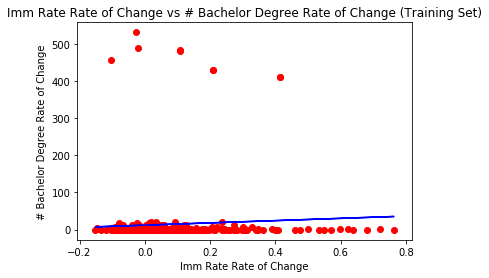

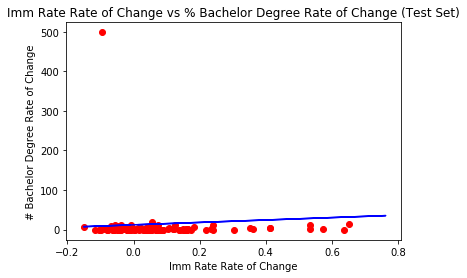

In [5]:
#X = df.drop(columns='Rate').values
#creating X and y dataframes
#X is RoC Rate 
#assoc_y is RoC Num Bachelor Degree
X = df.loc[:, 'RoC Rate'].values.reshape(-1,1)
bach_y = df.loc[:, 'RoC Num Bachelor Degree'].values
#split X and y with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X,bach_y, test_size=.25)

#define linear regression
regressor = LinearRegression()
#fit the regression with X train and Y train 
regressor.fit(X_train, y_train)

#predict y based on X test and the model fitted above 
y_pred = regressor.predict(X_test)

#plot scatter plot
#add labels and show values 
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Imm Rate Rate of Change vs # Bachelor Degree Rate of Change (Training Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# Bachelor Degree Rate of Change')
plt.show()

#plot scatter plot
#add labels and show values 
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Imm Rate Rate of Change vs % Bachelor Degree Rate of Change (Test Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# Bachelor Degree Rate of Change')
plt.show()

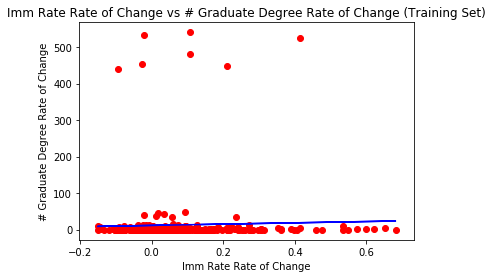

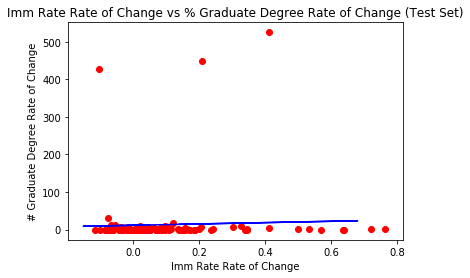

In [6]:
#X = df.drop(columns='Rate').values
#creating X and y dataframes
#X is RoC Rate 
#assoc_y is RoC Num Graduate Degree
X = df.loc[:, 'RoC Rate'].values.reshape(-1,1)
grad_y = df.loc[:, 'RoC Num Graduate Degree'].values
#split X and y with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X,grad_y, test_size=.25)

#define linear regression
regressor = LinearRegression()
#fit the regression with X train and Y train 
regressor.fit(X_train, y_train)

#predict y based on X test and the model fitted above 
y_pred = regressor.predict(X_test)

#plot scatter plot
#add labels and show values 
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Imm Rate Rate of Change vs # Graduate Degree Rate of Change (Training Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# Graduate Degree Rate of Change')
plt.show()

#plot scatter plot
#add labels and show values 
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Imm Rate Rate of Change vs % Graduate Degree Rate of Change (Test Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# Graduate Degree Rate of Change')
plt.show()

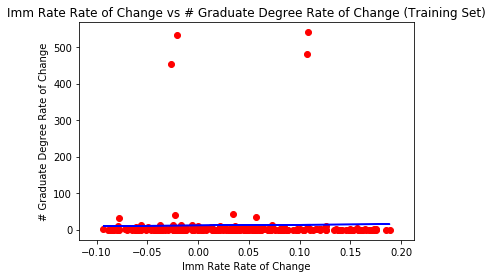

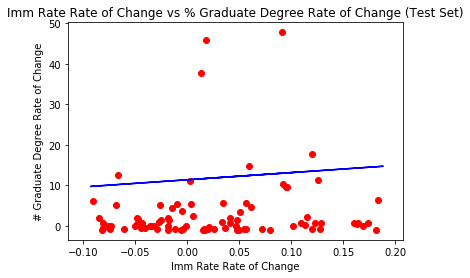

In [7]:
def elliptic_envelope_session():
    # Fit envelope
    envelope = EllipticEnvelope(support_fraction=1, contamination=0.2).fit(X)

    # Create an boolean indexing array to pick up outliers
    outliers = envelope.predict(X)==-1

    # Re-slice X,y into a cleaned dataset with outliers excluded
    X_clean = X[~outliers]
    y_clean = grad_y[~outliers]
    return X_clean, y_clean

def fit_plot(dataset_clean):
    # Unpack cleaned dataset
    X_clean, y_clean = dataset_clean
    
    X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=.25)
    
    # Assuming we have our set of inliers in X_clean we can re-fit
    model = LinearRegression().fit(X_train_clean, y_train_clean)
    y_pred = model.predict(X_test_clean)
    
    #plot scatter plot
    #add labels and show values 
    plt.scatter(X_train_clean[:,0], y_train_clean, color = 'red')
    plt.plot(X_train_clean, regressor.predict(X_train_clean), color = 'blue')
    plt.title('Imm Rate Rate of Change vs # Graduate Degree Rate of Change (Training Set)')
    plt.xlabel('Imm Rate Rate of Change')
    plt.ylabel('# Graduate Degree Rate of Change')
    plt.show()

    #plot scatter plot
    #add labels and show values 
    plt.scatter(X_test_clean[:,0], y_test_clean, color = 'red')
    plt.plot(X_train_clean, regressor.predict(X_train_clean), color='blue')
    plt.title('Imm Rate Rate of Change vs % Graduate Degree Rate of Change (Test Set)')
    plt.xlabel('Imm Rate Rate of Change')
    plt.ylabel('# Graduate Degree Rate of Change')
    plt.show()
    
fit_plot(elliptic_envelope_session())

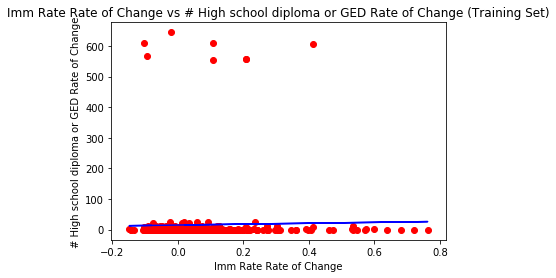

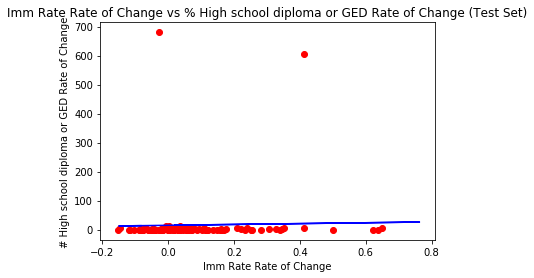

In [8]:
#X = df.drop(columns='Rate').values
#creating X and y dataframes
#X is RoC Rate 
#assoc_y is RoC Num High school diploma or GED
X = df.loc[:, 'RoC Rate'].values.reshape(-1,1)
GED_y = df.loc[:, 'RoC Num High school diploma or GED'].values
#split X and y with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X,GED_y, test_size=.25)

#define linear regression
regressor = LinearRegression()
#fit the regression with X train and Y train 
regressor.fit(X_train, y_train)

#predict y based on X test and the model fitted above 
y_pred = regressor.predict(X_test)

#plot scatter plot
#add labels and show values 
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Imm Rate Rate of Change vs # High school diploma or GED Rate of Change (Training Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# High school diploma or GED Rate of Change')
plt.show()

#plot scatter plot
#add labels and show values 
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Imm Rate Rate of Change vs % High school diploma or GED Rate of Change (Test Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# High school diploma or GED Rate of Change')
plt.show()

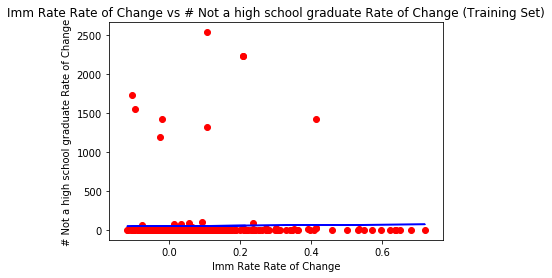

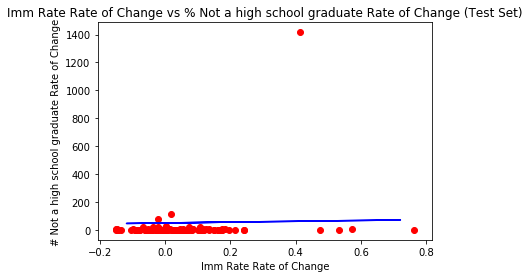

In [9]:
#X = df.drop(columns='Rate').values
#creating X and y dataframes
#X is RoC Rate 
#assoc_y is RoC Num Not a high school graduate 
X = df.loc[:, 'RoC Rate'].values.reshape(-1,1)
None_y = df.loc[:, 'RoC Num Not a high school graduate'].values
#split X and y with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X,None_y, test_size=.25)

#define linear regression
regressor = LinearRegression()
#fit the regression with X train and Y train 
regressor.fit(X_train, y_train)

#predict y based on X test and the model fitted above 
y_pred = regressor.predict(X_test)

#plot scatter plot
#add labels and show values 
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Imm Rate Rate of Change vs # Not a high school graduate Rate of Change (Training Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# Not a high school graduate Rate of Change')
plt.show()

#plot scatter plot
#add labels and show values 
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Imm Rate Rate of Change vs % Not a high school graduate Rate of Change (Test Set)')
plt.xlabel('Imm Rate Rate of Change')
plt.ylabel('# Not a high school graduate Rate of Change')
plt.show()